In [71]:
## 기본 모듈
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 딥러닝 모듈
import tensorflow
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, BatchNormalization, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.callbacks import TensorBoard, EarlyStopping

In [77]:
### datasets
from keras.datasets import cifar10

In [78]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

In [79]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [80]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(37500, 32, 32, 3) (37500, 1)
(10000, 32, 32, 3) (10000, 1)


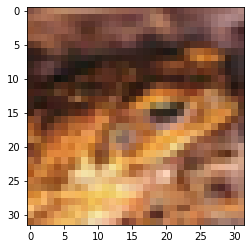

In [81]:
plt.imshow(X_train[0])
plt.show()

In [82]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [83]:
cifar_dic = {
    "airplane" : 0,
    "automobile" : 1,
    "bird" : 2,
    "cat" : 3,
    "deer" : 4,
    "dog" : 5,
    "frog" : 6,
    "horse" : 7,
    "ship" : 8,
    "truck" : 9,
}

In [84]:
cifar_dic = {v:k for k,v in cifar_dic.items()}

In [85]:
cifar_dic[5]

'dog'

In [86]:
np.argmax(y_train[0])

6

In [87]:
input_shape = X_train.shape[1:]
output_shape = y_train.shape[1]

In [88]:
input_shape
# 32*32*3

(32, 32, 3)

In [94]:
model = Sequential(
    [
    Flatten(input_shape=input_shape),
    Dense(1024,activation="relu"),
    Dense(512,activation="relu"),
    # Dense(256,activation="relu"),
    Dense(128,activation="relu"),
    Dense(output_shape,activation="softmax"),
    ]
)

In [95]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 1024)              3146752   
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dense_20 (Dense)            (None, 128)               65664     
                                                                 
 dense_21 (Dense)            (None, 10)                1290      
                                                                 
Total params: 3,738,506
Trainable params: 3,738,506
Non-trainable params: 0
_________________________________________________________________


In [60]:
opt = "rmsprop"
loss = "categorical_crossentropy"
metrics = ["accuracy"]
model.compile(
    optimizer=opt,
    loss=loss,
    metrics=metrics
)

In [90]:
cifar10_callback = [EarlyStopping(patience=20,
                                restore_best_weights=True),
                    TensorBoard(log_dir="./cifar10_logs")]


In [62]:
model.fit(X_train,
            y_train,
            epochs=20,
            batch_size=400,
            validation_data=(X_val,y_val),
            callbacks=cifar10_callback)

Epoch 1/20
94/94 [==============================] - 8s 80ms/step - loss: 352.9753 - accuracy: 0.1090 - val_loss: 2.8519 - val_accuracy: 0.0752
Epoch 2/20
94/94 [==============================] - 8s 88ms/step - loss: 6.6266 - accuracy: 0.1001 - val_loss: 2.3056 - val_accuracy: 0.1015
Epoch 3/20
94/94 [==============================] - 9s 96ms/step - loss: 5.2407 - accuracy: 0.1010 - val_loss: 13.6587 - val_accuracy: 0.0990
Epoch 4/20
94/94 [==============================] - 10s 101ms/step - loss: 2.4641 - accuracy: 0.0995 - val_loss: 2.3030 - val_accuracy: 0.0942
Epoch 5/20
94/94 [==============================] - 10s 104ms/step - loss: 2.5394 - accuracy: 0.1004 - val_loss: 2.3028 - val_accuracy: 0.0946
Epoch 6/20
94/94 [==============================] - 9s 99ms/step - loss: 2.3158 - accuracy: 0.1023 - val_loss: 2.3027 - val_accuracy: 0.0946
Epoch 7/20
94/94 [==============================] - 10s 105ms/step - loss: 2.3520 - accuracy: 0.1017 - val_loss: 2.3027 - val_accuracy: 0.0950
Epoc

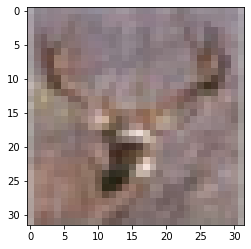

In [67]:
plt.imshow(X_train[5])

In [128]:
### Conv2D
model1 = Sequential(
    [
        Conv2D(100,(3,3),activation="relu",input_shape=input_shape),
        MaxPooling2D((2,2)),
        Conv2D(50,(2,2),activation="relu"),
        MaxPooling2D((3,3)),
        Conv2D(30,(2,2),activation="relu"),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(512,activation="relu"),
        Dense(output_shape, activation="softmax")
    ]
)

model2 = Sequential(
    [
        Conv2D(30,(3,3),activation="relu",input_shape=input_shape),
        MaxPooling2D((2,2)),
        Conv2D(50,(2,2),activation="relu"),
        MaxPooling2D((3,3)),
        Conv2D(100,(2,2),activation="relu"),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(512,activation="relu"),
        Dense(output_shape, activation="softmax")
    ]
)

In [129]:
model1.summary()
model2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 100)       2800      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 50)        20050     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 50)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 3, 3, 30)          6030      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 1, 1, 30)       

In [121]:
# # 
# len(model.layers[0].get_weights())

# model1.layers[0].get_weights()[0].shape

# X_train[[0]].shape

# np.dot(X_train[[0]],model.layers[0].get_weights()[0]).shape

(1, 32, 32, 3, 3, 100)

In [130]:
opt = "rmsprop"
loss = "categorical_crossentropy"
metrics = ["accuracy"]

model1.compile(
    optimizer=opt,
    loss=loss,
    metrics=metrics
)

model2.compile(
    optimizer=opt,
    loss=loss,
    metrics=metrics
)

In [132]:
cifar10_callbacks = [
    EarlyStopping(patience=20, restore_best_weights=True),
    TensorBoard(log_dir="./cifar10_logs")]

# cifar10_callbacks = [
#     keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True),
#     keras.callbacks.TensorBoard(log_dir="./cifar10_logs")]

In [133]:
model1.fit(X_train,
            y_train,
            epochs=20,
            validation_data=(X_val,y_val),
            callbacks=cifar10_callbacks)

model2.fit(X_train,
            y_train,
            epochs=20,
            validation_data=(X_val,y_val),
            callbacks=cifar10_callbacks)

Epoch 1/20
1172/1172 [==============================] - 50s 42ms/step - loss: 1.9932 - accuracy: 0.2821 - val_loss: 1.7561 - val_accuracy: 0.3556
Epoch 2/20
1172/1172 [==============================] - 55s 47ms/step - loss: 1.7280 - accuracy: 0.3742 - val_loss: 1.6627 - val_accuracy: 0.3887
Epoch 3/20
1172/1172 [==============================] - 56s 48ms/step - loss: 1.6280 - accuracy: 0.4174 - val_loss: 1.6284 - val_accuracy: 0.4186
Epoch 4/20
1172/1172 [==============================] - 56s 48ms/step - loss: 1.5767 - accuracy: 0.4354 - val_loss: 1.8457 - val_accuracy: 0.3856
Epoch 5/20
1172/1172 [==============================] - 56s 48ms/step - loss: 1.5484 - accuracy: 0.4462 - val_loss: 1.5806 - val_accuracy: 0.4300
Epoch 6/20
1172/1172 [==============================] - 56s 48ms/step - loss: 1.5289 - accuracy: 0.4601 - val_loss: 1.5413 - val_accuracy: 0.4549
Epoch 7/20
1172/1172 [==============================] - 58s 50ms/step - loss: 1.5152 - accuracy: 0.4630 - val_loss: 1.4829 -

In [134]:
print(model1.evaluate(X_test,y_test))
print(model2.evaluate(X_test,y_test))

313/313 [==============================] - 4s 12ms/step - loss: 1.5978 - accuracy: 0.4339
[1.59779691696167, 0.43389999866485596]
313/313 [==============================] - 2s 7ms/step - loss: 1.6281 - accuracy: 0.4440
[1.628085732460022, 0.4440000057220459]


In [135]:
(np.dot(X_train[0:1],model1.layers[0].get_weights()[0]) + model1.layers[0].get_weights()[1]).shape

(1, 32, 32, 3, 3, 100)

In [136]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 100)       2800      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 15, 15, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 50)        20050     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 4, 4, 50)         0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 3, 3, 30)          6030      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 1, 1, 30)       